In [1]:
import pandas as pd

In [2]:
basic_path = r'C:\Users\82103\Documents\ds_study\datas\Churn_Prediction\random_120000_user_logs'

user_logs = pd.read_parquet(basic_path+r'\random_120000_user_logs.parquet')
transactions = pd.read_parquet(basic_path+r'\random_120000_transaction.parquet')
train = pd.read_parquet(basic_path+r'\random_120000_train.parquet')
members = pd.read_parquet(basic_path+r'\random_120000_members.parquet')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

%matplotlib inline
path = 'C:/Windows/Fonts/malgun.ttf'

if platform.system() == 'Darwin':
    rc('font', family = 'Arial Unicode MS')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown')

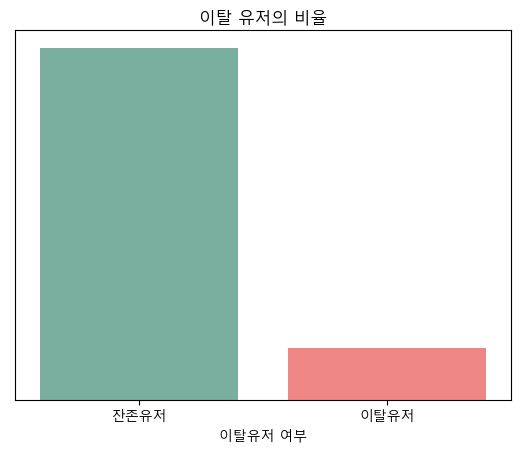

In [4]:
import copy
tmp = copy.deepcopy(train)

tmp.replace({'is_churn' : {0 : '잔존유저', 1 : '이탈유저'}}, inplace=True)

sns.countplot(x='is_churn', data=tmp, palette = ['#72B6A1', '#FF7575'])
plt.xlabel('이탈유저 여부')
plt.ylabel('사용자 수')
plt.title('이탈 유저의 비율')
plt.gca().axes.yaxis.set_visible(False) #y축만 없애기
plt.show()

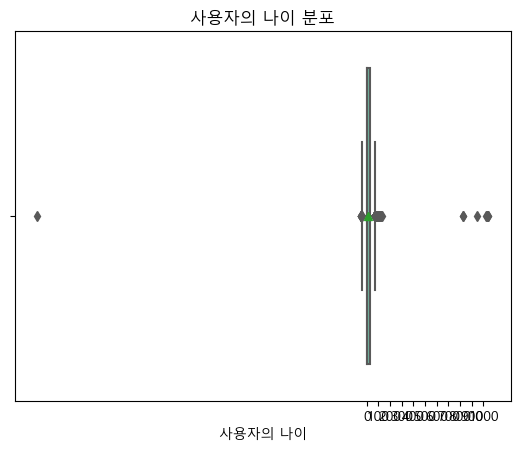

In [5]:
import copy
tmp = copy.deepcopy(members)

sns.boxplot(data=tmp, x="bd", showmeans = True, palette='Set2')
plt.xlabel('사용자의 나이')
plt.xticks([0, 100, 200, 300, 400, 500,
            600, 700, 800, 900, 1000])
plt.title('사용자의 나이 분포')
plt.show()

In [6]:
import copy
tmp = copy.deepcopy(members)

for idx, year in tmp.iterrows():
    tmp.loc[idx, 'year'] = tmp.loc[idx, 'registration_init_time'].year
tmp = tmp.astype({'year' : 'int'})

tmp = pd.merge(tmp, train, on = 'msno_num', how = 'inner')

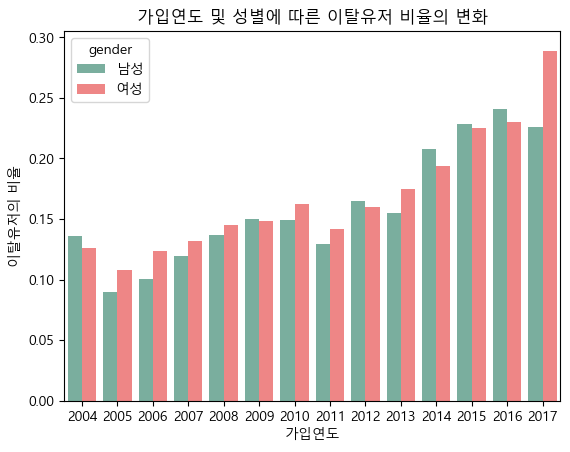

In [7]:
tmp.replace({'gender' : {'female' : '여성', 'male' : '남성'}}, inplace=True)

sns.barplot(x='year', y='is_churn', data = tmp, hue = 'gender', palette=['#72B6A1', '#FF7575'], errorbar = ('ci', False))
plt.xlabel('가입연도')
plt.ylabel('이탈유저의 비율')
plt.title('가입연도 및 성별에 따른 이탈유저 비율의 변화')
plt.show()

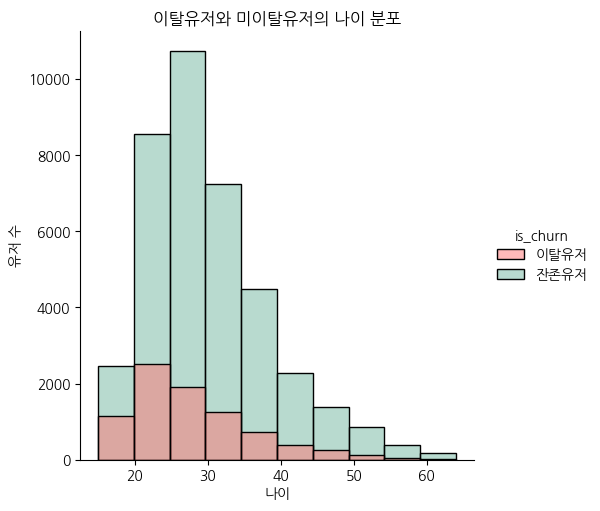

In [134]:
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mat

tmp = pd.merge(members, train, on = 'msno_num', how = 'inner')
tmp = tmp[(tmp['bd']>=15) & (tmp['bd']<=64)] # 경제활동인구 연령을 대상으로 함
tmp.replace({'is_churn' : {0 : '잔존유저', 1 : '이탈유저'}}, inplace = True)

sns.displot(data = tmp, x = 'bd',
            hue = 'is_churn', 
            hue_order = ['이탈유저', '잔존유저'], 
            bins = 10, 
            palette = ['#FF7575', '#72B6A1'])
plt.xlabel('나이')
plt.ylabel('유저 수')
plt.title('이탈유저와 미이탈유저의 나이 분포')
plt.show()

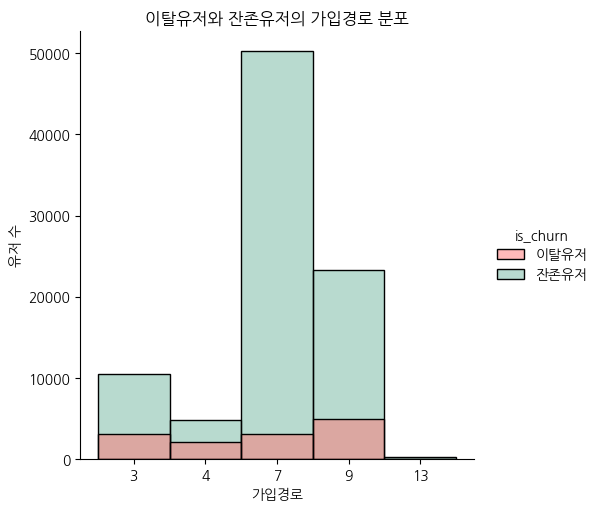

In [148]:
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mat

tmp = pd.merge(members, train, on = 'msno_num', how = 'inner')
tmp.replace({'is_churn' : {0 : '잔존유저', 1 : '이탈유저'}}, inplace = True)
tmp.sort_values('registered_via', inplace = True, ascending=True)
tmp = tmp.astype({'registered_via' : 'str'})

sns.displot(data = tmp, x = 'registered_via',
            hue = 'is_churn',
            hue_order = ['이탈유저', '잔존유저'], 
            palette = ['#FF7575', '#72B6A1'])
plt.xlabel('가입경로')
plt.ylabel('유저 수')
plt.title('이탈유저와 잔존유저의 가입경로 분포')
plt.show()

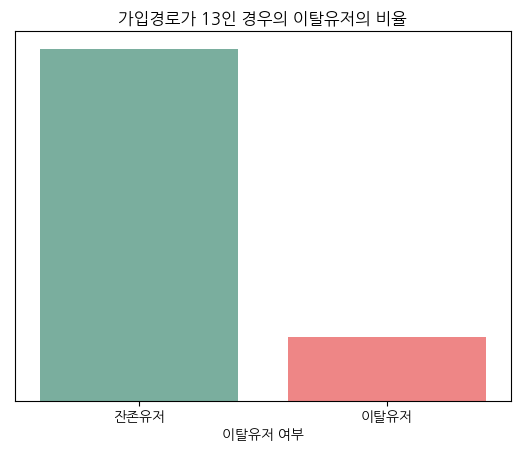

In [132]:
tmp = pd.merge(members, train, on = 'msno_num', how = 'inner')
tmp.replace({'is_churn' : {0 : '잔존유저', 1 : '이탈유저'}}, inplace = True)
tmp.sort_values('registered_via', inplace = True, ascending= False)
tmp = tmp.astype({'registered_via' : 'str'})

sns.countplot(x='is_churn', data=tmp[tmp['registered_via']=='13'], palette = ['#72B6A1', '#FF7575'])
plt.xlabel('이탈유저 여부')
plt.title('가입경로가 13인 경우의 이탈유저의 비율')
plt.gca().axes.yaxis.set_visible(False) #y축만 없애기
plt.show()

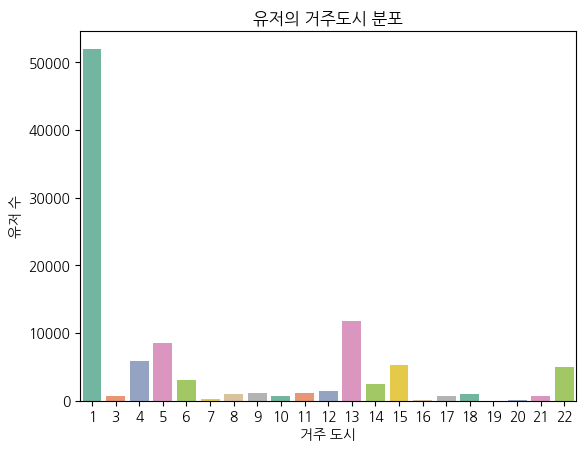

In [147]:
tmp = pd.merge(members, train, on = 'msno_num', how = 'inner')
sns.countplot(x='city',data = tmp, palette='Set2')
plt.xlabel('거주 도시')
plt.ylabel('유저 수')
plt.title('유저의 거주도시 분포')
plt.show()

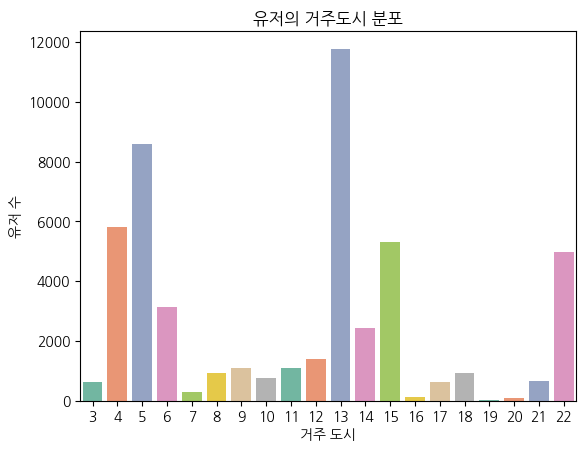

In [244]:
tmp = pd.merge(members, train, on = 'msno_num', how = 'inner')
sns.countplot(x='city',data = tmp[tmp['city']!=1], palette='Set2')
plt.xlabel('거주 도시')
plt.ylabel('유저 수')
plt.title('유저의 거주도시 분포')
plt.show()

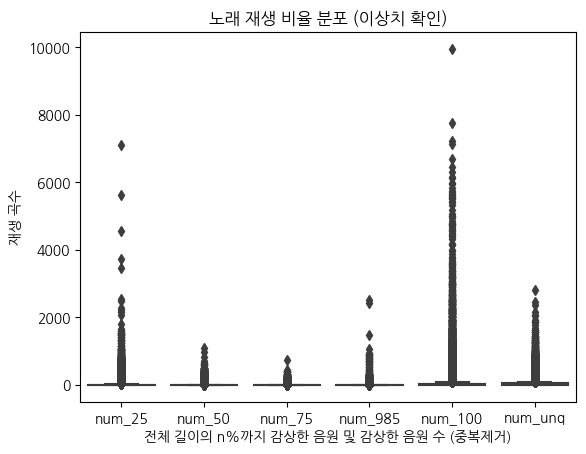

In [157]:
cols = list(user_logs.columns)[2:8]
sns.boxplot(data=user_logs[cols])
plt.xlabel('전체 길이의 n%까지 감상한 음원 및 감상한 음원 수 (중복제거)')
plt.ylabel('재생 곡수')
plt.title('노래 재생 비율 분포 (이상치 확인)')
plt.show()

In [163]:
user_logs.sort_values('total_secs', ascending=False)

,msno_num,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
24166098,5122385,2015-05-25,0,0,0,0,3,1,9.223372e+15
27438485,2199597,2015-05-04,0,0,0,0,1,1,9.223372e+15
4161943,6592924,2015-06-28,0,0,0,0,1,1,9.223372e+15
6207701,5678277,2015-08-13,0,0,0,0,1,1,9.223372e+15
27549580,7275973,2015-04-01,5,0,0,1,63,41,8.813723e+07
...,...,...,...,...,...,...,...,...,...
23575975,6000737,2015-07-01,10,0,0,0,9,4,-9.223372e+15
6744500,1869465,2015-07-05,1,1,0,0,1,3,-9.223372e+15
1080863,2813444,2015-06-01,0,2,0,0,1,3,-9.223372e+15
157293,295758,2015-05-07,1,0,0,0,7,2,-9.223372e+15


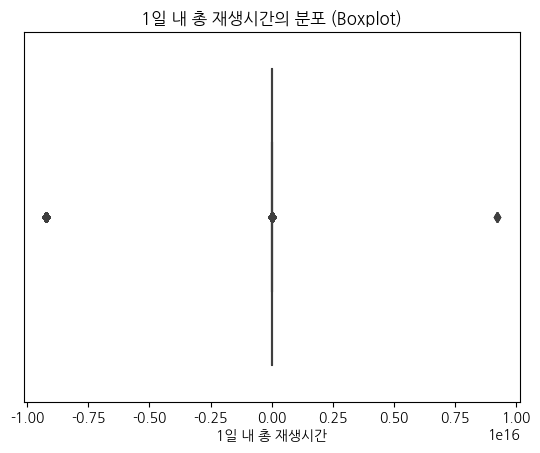

In [164]:
sns.boxplot(data=user_logs[['total_secs']] ,orient='h')
plt.xlabel('1일 내 총 재생시간')
plt.title('1일 내 총 재생시간의 분포 (Boxplot)')
plt.gca().axes.yaxis.set_visible(False) #y축만 없애기
plt.show()

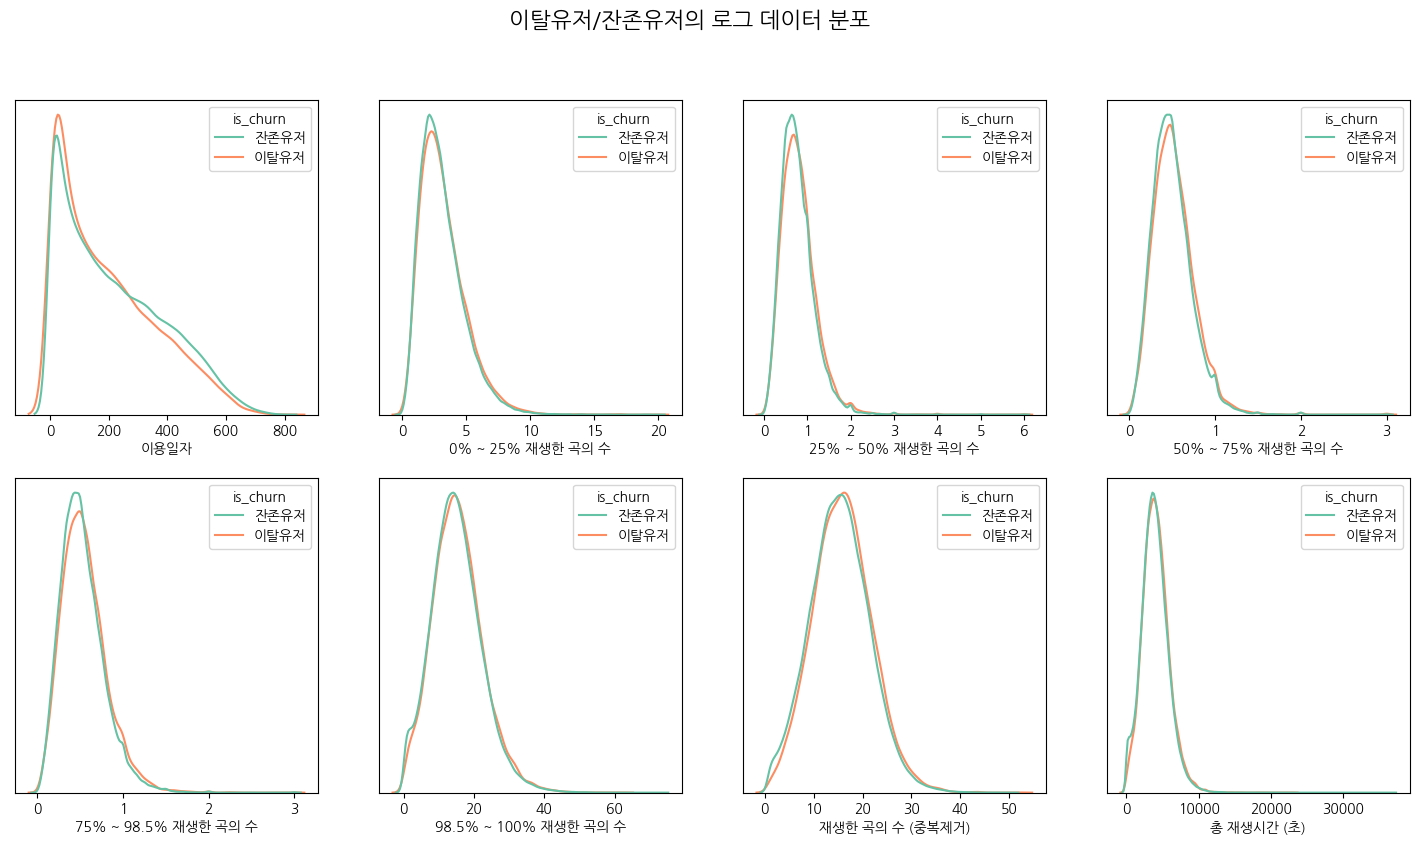

In [178]:
def remove_negative(df):
    df = df[(df['total_secs'] >= 0)&
            (df['num_25'] >= 0)&
            (df['num_50'] >= 0)&
            (df['num_75'] >= 0)&
            (df['num_985'] >= 0)&
            (df['num_100'] >= 0)&
            (df['num_unq'] >= 0)]

    return df

def remove_over_day(df):
   df = df[df['total_secs'] <= 86400]

   return df

def remove_quantile(df):
    for col in ['num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq']:
        df2 = df[df[col] > 0].copy()
        level_1q = df2[col].quantile(0.25)
        level_3q = df2[col].quantile(0.75)
        IQR = level_3q - level_1q
        rev_range = 1.5
        df = df[(df[col] <= level_3q+(rev_range*IQR)) & (df[col] >= level_1q-(rev_range*IQR))]
    
    return df

df_new = (remove_quantile(remove_over_day(remove_negative(user_logs))))
df_new = df_new.sort_values('msno_num')


df_new_grouped = df_new.groupby('msno_num').agg({'date':'count',
                                                 'num_25':'mean', 
                                                 'num_50':'mean',
                                                 'num_75':'mean', 
                                                 'num_985':'mean', 
                                                 'num_100':'mean',
                                                 'num_unq':'mean', 
                                                 'total_secs':'mean'})


df_new_grouped_train = train.join(df_new_grouped, on='msno_num', how='inner')

df_new_grouped_train.replace({'is_churn' : {0 : '잔존유저', 1 : '이탈유저'}}, inplace = True)

fig, axs = plt.subplots(2, 4, figsize=(18, 9))

fig.suptitle('이탈유저/잔존유저의 로그 데이터 분포', fontsize=16) # figure 제목

for idx, col in enumerate(['date', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq', 'total_secs']):
    ax = axs.flatten()[idx]
    sns.kdeplot(df_new_grouped_train[df_new_grouped_train[col] != 0], x=col, hue='is_churn', common_norm=False, ax=ax, palette = 'Set2')
    if col == 'date':
        ax.set_xlabel('이용일자')
    elif col == 'num_25':
        ax.set_xlabel('0% ~ 25% 재생한 곡의 수')
    elif col == 'num_50':
        ax.set_xlabel('25% ~ 50% 재생한 곡의 수')
    elif col == 'num_75':
        ax.set_xlabel('50% ~ 75% 재생한 곡의 수')
    elif col == 'num_985':
        ax.set_xlabel('75% ~ 98.5% 재생한 곡의 수')
    elif col == 'num_100':
        ax.set_xlabel('98.5% ~ 100% 재생한 곡의 수')
    elif col == 'num_unq':
        ax.set_xlabel('재생한 곡의 수 (중복제거)')
    else:
        ax.set_xlabel('총 재생시간 (초)')
    ax.yaxis.set_visible(False)
plt.show()

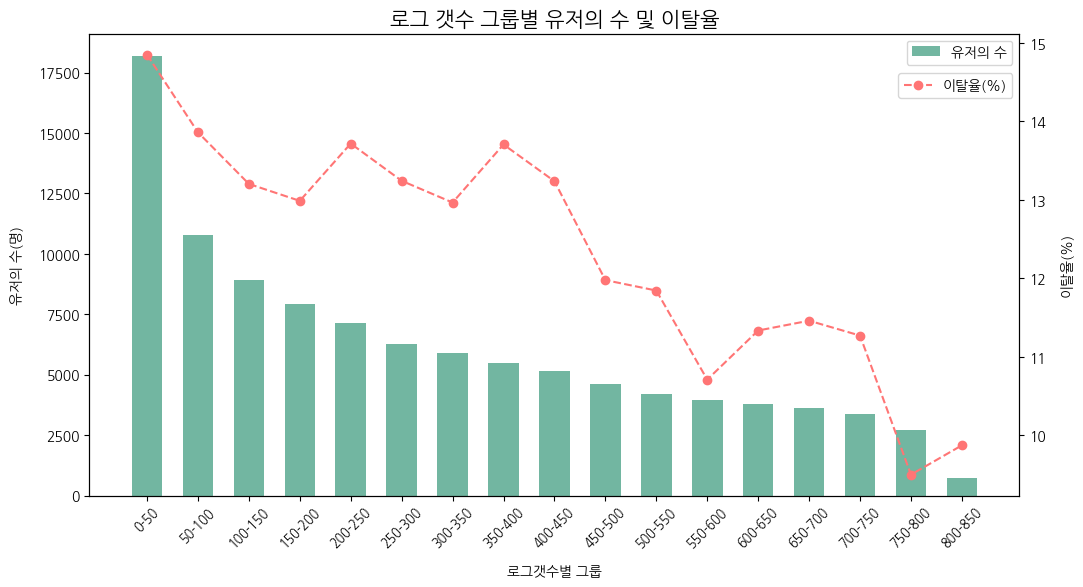

In [279]:
import numpy as np

# 로그갯수 와 이탈 비율 page.10
user_logs_tmp = user_logs.groupby(['msno_num']).agg({'date' : 'count', 'total_secs' : 'sum'})
member_train_log = pd.merge(train, user_logs_tmp , on='msno_num',how='inner')
member_train_log['date_count'] = pd.cut(member_train_log['date'], bins= [0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850],
                                        labels=['0-50','50-100','100-150','150-200','200-250','250-300','300-350','350-400','400-450','450-500','500-550','550-600',
                                                '600-650','650-700','700-750','750-800','800-850'])
# 로그갯수

idx = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

tmp = pd.DataFrame(member_train_log.groupby('date_count', as_index=False)['msno_num'].count())

plt.figure(figsize=(12,6))
plt.bar(idx, tmp['msno_num'], width = 0.6, label = '유저의 수', color = '#72B6A1')

plt.xticks(idx, tmp['date_count'], fontsize = 9, rotation = 45)
plt.xlabel('로그갯수별 그룹', fontsize = 10, labelpad= 10)
plt.ylabel('유저의 수(명)', fontsize = 10, labelpad= 10)
plt.title('로그 갯수 그룹별 유저의 수 및 이탈율', fontsize = 15)
plt.legend(loc=0)

tmp_0 = pd.DataFrame(member_train_log.groupby(['date_count', 'is_churn'], as_index=False)['msno_num'].count())
tmp_1 = tmp_0[tmp_0['is_churn']==0]
tmp_2 = tmp_0[tmp_0['is_churn']==1]
tmp_3 = pd.merge(tmp_1, tmp_2, on = 'date_count', how = 'inner').drop(columns=['is_churn_x', 'is_churn_y'])
tmp_3['ratio'] = tmp_3['msno_num_y'] / (tmp_3['msno_num_x'] + tmp_3['msno_num_y']) * 100
tmp_3.drop(columns=['msno_num_x', 'msno_num_y'], inplace=True)
tmp_3

line_plot = plt.twinx()
line_plot.plot(tmp_3['date_count'], tmp_3['ratio'], marker = 'o', linestyle = '--', color = '#FF7575', label = '이탈율(%)')
line_plot.tick_params(axis = 'y', labelsize = 10)
line_plot.set_ylabel('이탈율(%)', fontsize = 10, labelpad= 10)
line_plot.legend(bbox_to_anchor = (1, 0.93))

plt.show()

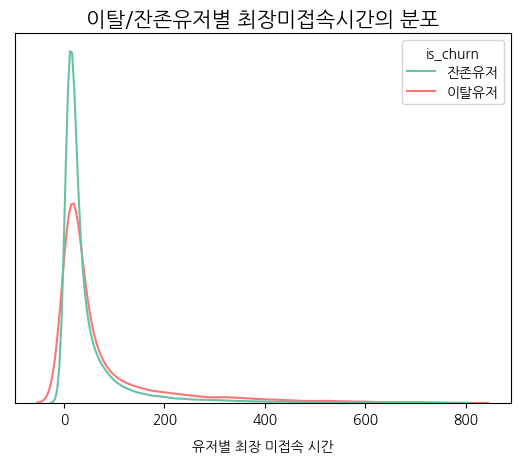

In [350]:
def remove_negative(df):
    df = df[(df['total_secs'] >= 0)&
            (df['num_25'] >= 0)&
            (df['num_50'] >= 0)&
            (df['num_75'] >= 0)&
            (df['num_985'] >= 0)&
            (df['num_100'] >= 0)&
            (df['num_unq'] >= 0)]

    return df

def remove_over_day(df):
   df = df[df['total_secs'] <= 86400]

   return df

def remove_quantile(df):
    for col in ['num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq']:
        df2 = df[df[col] > 0].copy()
        level_1q = df2[col].quantile(0.25)
        level_3q = df2[col].quantile(0.75)
        IQR = level_3q - level_1q
        rev_range = 1.5
        df = df[(df[col] <= level_3q+(rev_range*IQR)) & (df[col] >= level_1q-(rev_range*IQR))]
    
    return df

df_new = (remove_quantile(remove_over_day(remove_negative(user_logs))))
df_new = df_new.sort_values('msno_num') 

df_new_sorted = df_new.sort_values(['msno_num', 'date'])
df_new_sorted['time_since_last_login'] = df_new_sorted.groupby('msno_num')['date'].diff().fillna(pd.Timedelta(seconds=0))
max_non_login_duration = df_new_sorted.groupby('msno_num')['time_since_last_login'].max().reset_index()
df_new_grouped_train = df_new_grouped_train.merge(max_non_login_duration, on='msno_num', how='inner')
df_new_grouped_train['time_since_last_login'] = df_new_grouped_train['time_since_last_login'].dt.days

sns.kdeplot(df_new_grouped_train, x='time_since_last_login', hue='is_churn', common_norm=False, palette=['#66c2a5', '#ff7575'])
plt.gca().axes.yaxis.set_visible(False) #y축만 없애기
plt.xlabel('유저별 최장 미접속 시간', fontsize = 10, labelpad= 10)
plt.title('이탈/잔존유저별 최장미접속시간의 분포', fontsize = 15)
plt.show()

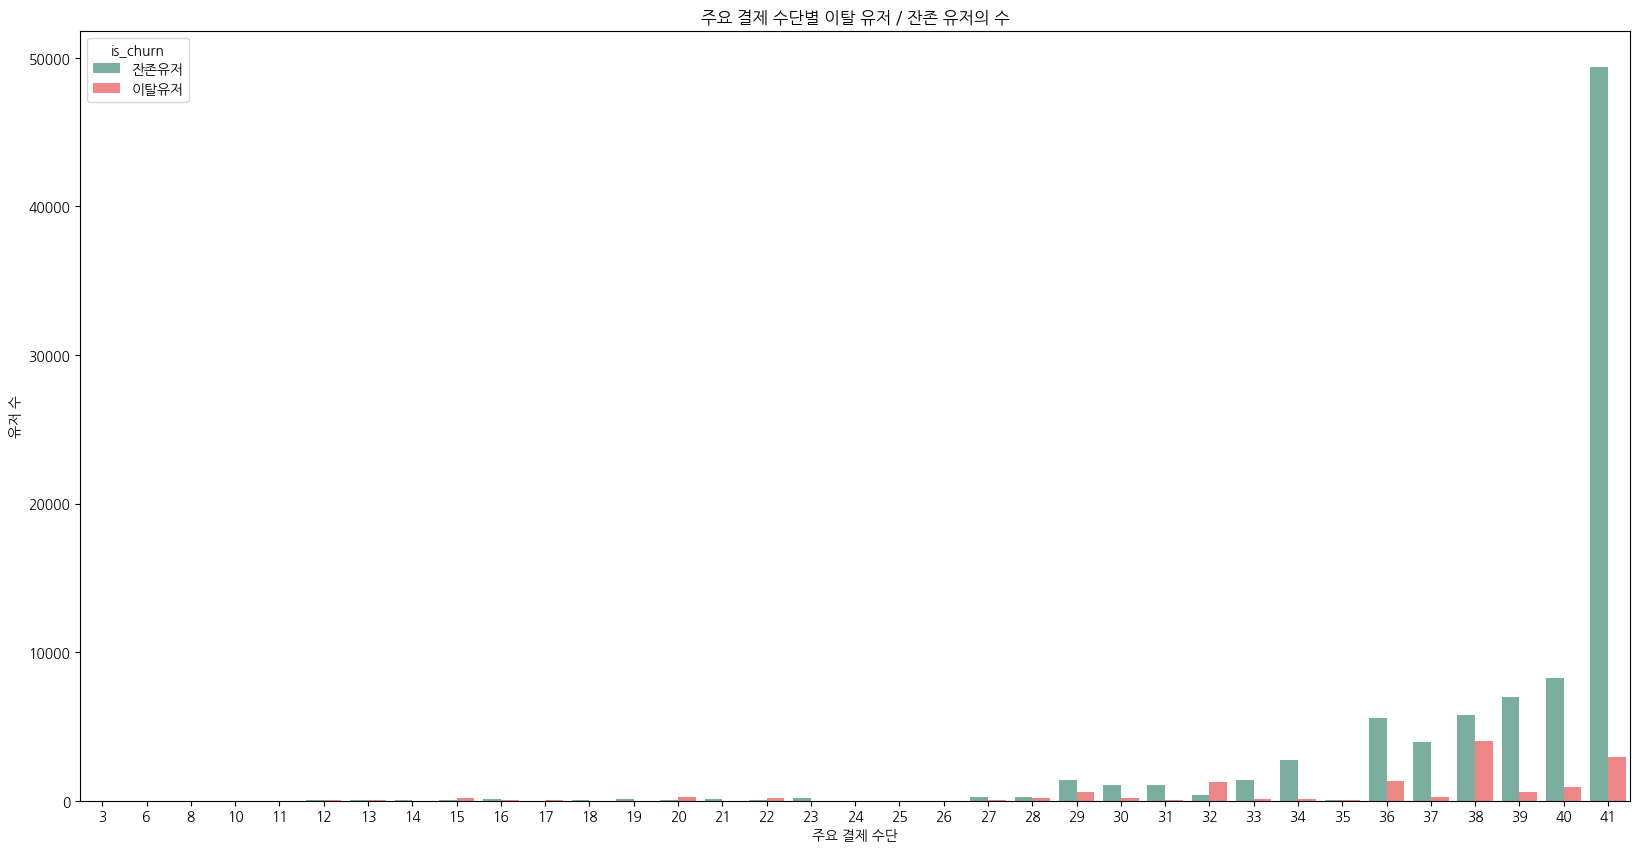

In [263]:
tmp = pd.DataFrame(transactions.groupby(['msno_num'], as_index = False)['payment_method_id'].apply(lambda x: x.mode().iloc[0])).rename(columns = {'payment_method_id' : 'main_payment_method'})
tmp = pd.merge(tmp, train, on = 'msno_num', how = 'inner')
tmp.replace({'is_churn' : {0 : '잔존유저', 1 : '이탈유저'}}, inplace = True)

plt.figure(figsize=(20,10))
sns.countplot(x='main_payment_method', data=tmp, hue='is_churn', palette = ['#72B6A1', '#FF7575'])
plt.xlabel('주요 결제 수단')
plt.ylabel('유저 수')
plt.title('주요 결제 수단별 이탈 유저 / 잔존 유저의 수')
plt.show()

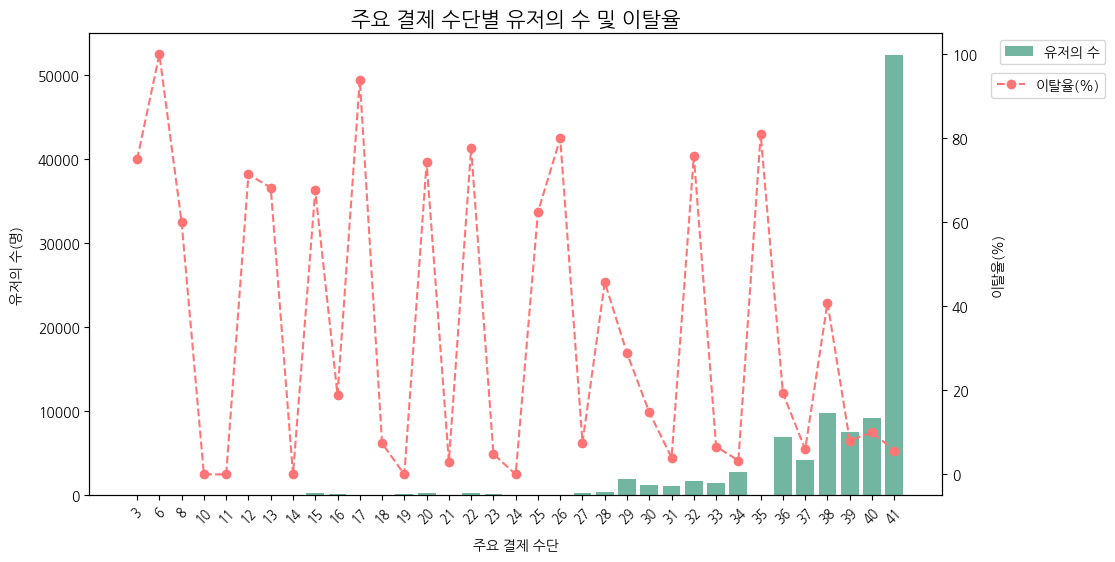

In [320]:
import numpy as np

tmp = pd.DataFrame(transactions.groupby(['msno_num'], as_index = False)['payment_method_id'].apply(lambda x: x.mode().iloc[0])).rename(columns = {'payment_method_id' : 'main_payment_method'})
tmp = pd.DataFrame(tmp.groupby('main_payment_method', as_index=False)['msno_num'].count())
tmp = tmp.astype({'main_payment_method' : 'str'})

idx = np.array([idx for idx in range(tmp['main_payment_method'].nunique())])

fig, ax = plt.subplots(figsize=(11,6))

plt.bar(idx, tmp['msno_num'], width = 0.8, label = '유저의 수', color = '#72B6A1')

plt.xticks(idx, tmp['main_payment_method'], fontsize = 9, rotation = 45)
plt.xlabel('주요 결제 수단', fontsize = 10, labelpad= 10)
plt.ylabel('유저의 수(명)', fontsize = 10, labelpad= 10)
plt.title('주요 결제 수단별 유저의 수 및 이탈율', fontsize = 15)
plt.legend(bbox_to_anchor = (1.2, 1))

tmp = pd.DataFrame(transactions.groupby(['msno_num'], as_index = False)['payment_method_id'].apply(lambda x: x.mode().iloc[0])).rename(columns = {'payment_method_id' : 'main_payment_method'})
tmp = pd.merge(tmp, train, on = 'msno_num', how = 'inner')
tmp_0 = pd.DataFrame(tmp.groupby(['main_payment_method', 'is_churn'], as_index=False)['msno_num'].count())
tmp_1 = tmp_0[tmp_0['is_churn']==0]
tmp_2 = tmp_0[tmp_0['is_churn']==1]
tmp_3 = pd.merge(tmp_1, tmp_2, on = 'main_payment_method', how = 'outer').drop(columns=['is_churn_x', 'is_churn_y'])
tmp_3.fillna(0, inplace=True)
tmp_3 = tmp_3.astype({'main_payment_method' : 'int'})
tmp_3.sort_values('main_payment_method', inplace=True)
tmp_3['ratio'] = tmp_3['msno_num_y'] / (tmp_3['msno_num_x'] + tmp_3['msno_num_y']) * 100
tmp_3.drop(columns=['msno_num_x', 'msno_num_y'], inplace=True)
tmp_3.reset_index(drop=True, inplace=True)
tmp_3 = tmp_3.astype({'main_payment_method' : 'str'})

line_plot = ax.twinx()
line_plot.plot(tmp_3['main_payment_method'], tmp_3['ratio'], marker = 'o', linestyle = '--', color = '#FF7575', label = '이탈율(%)')
line_plot.set_ylabel('이탈율(%)', fontsize = 10, labelpad= 10)
line_plot.legend(bbox_to_anchor = (1.2, 0.93))

plt.show()

C:\Users\nuno3\AppData\Local\Temp\ipykernel_8848\1249055016.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  transaction_filter4 = ((transactions['membership_expire_date'] >= min_timestamp) & (transactions['membership_expire_date'] <= max_timestamp))


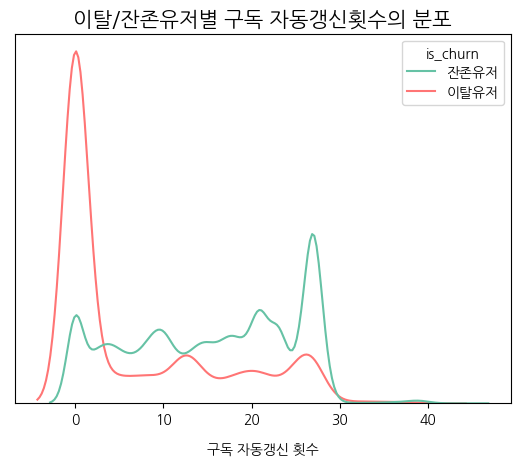

In [353]:
import datetime

# 아이디와 거래일의 중복값 중 첫번째 & 구독 취소 유저가 아닌 경우를 제거
transaction_filter1 = (~((transactions.duplicated(['msno_num', 'transaction_date'], keep='first')) & (transactions['is_cancel'] == 0)))

# 위에서 필터링되지 않은 같은 구독 취소 거래가 중복된 값 제거
cols = list(transactions.columns)[1:9]
cols.remove('membership_expire_date')
transaction_filter2 = (~((transactions.duplicated(cols, keep='first')) & (transactions['is_cancel'] == 1)))

# 멤버쉽 만료일 > 거래일 인 경우만 남김
transaction_filter3 = (transactions['transaction_date'] < transactions['membership_expire_date'])

# kkbox 출시일인 2005년부터 시작하여 최대 구독 기간인 1년 + 30일(공짜로 줌) 이후까지
min_timestamp = pd.Timestamp(datetime.date(2005,1,1))
max_timestamp = pd.Timestamp(datetime.date(2018,4,30))

# 만료일이 서비스 시작일인 2005년부터 구독권의 최장기간인 1년 + 30일 이하(2018.4.31 이하)인 경우만 남김
transaction_filter4 = ((transactions['membership_expire_date'] >= min_timestamp) & (transactions['membership_expire_date'] <= max_timestamp))

transaction_filtered = transactions[transaction_filter1&transaction_filter2&transaction_filter3&transaction_filter4]

transaction_autorenew = transaction_filtered.groupby('msno_num')[['is_auto_renew']].sum()
train_autorenew =train.join(transaction_autorenew, on='msno_num', how='inner')
train_autorenew.replace({'is_churn' : {0 : '잔존유저', 1 : '이탈유저'}}, inplace = True)

sns.kdeplot(train_autorenew, x='is_auto_renew', hue='is_churn', common_norm=False, palette=['#66c2a5', '#ff7575'])
plt.gca().axes.yaxis.set_visible(False) #y축만 없애기
plt.xlabel('구독 자동갱신 횟수', fontsize = 10, labelpad= 12)
plt.title('이탈/잔존유저별 구독 자동갱신횟수의 분포', fontsize = 15)
plt.show()

In [381]:
tmp = transactions.astype({'transaction_date': 'datetime64'})
tmp['year_month'] = tmp['transaction_date'].apply(lambda x: x.to_period('Y'))
tmp = tmp.drop_duplicates(subset=['msno_num', 'year_month'], keep='last')
tmp = tmp.groupby(['msno_num'])[['year_month']].count().reset_index()
tmp.rename(columns={'year_month': 'duration'},inplace=True)
tmp = pd.merge(tmp, train, on='msno_num',how='inner')
tmp = pd.DataFrame(tmp.groupby('duration', as_index=False)['msno_num'].count())
tmp = tmp.astype({'duration' : 'str'})
tmp.replace({'duration' : {'1':'1년', '2' : '2년', '3' : '3년'}}, inplace=True)
tmp

,duration,msno_num
0,1,6881
1,2,34091
2,3,61801


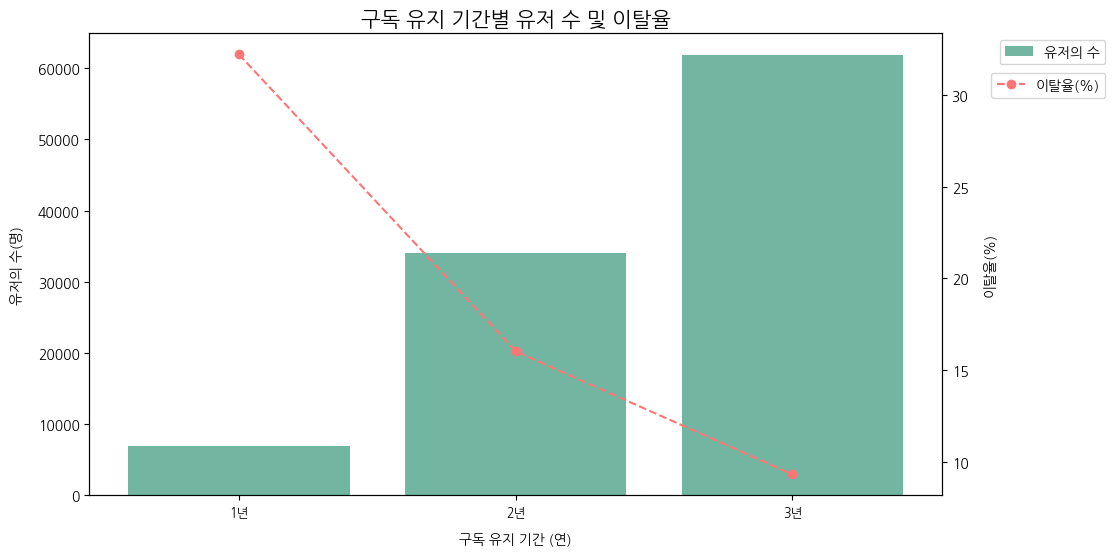

In [382]:
import numpy as np

tmp = transactions.astype({'transaction_date': 'datetime64'})
tmp['year_month'] = tmp['transaction_date'].apply(lambda x: x.to_period('Y'))
tmp = tmp.drop_duplicates(subset=['msno_num', 'year_month'], keep='last')
tmp = tmp.groupby(['msno_num'])[['year_month']].count().reset_index()
tmp.rename(columns={'year_month': 'duration'},inplace=True)
tmp = pd.merge(tmp, train, on='msno_num',how='inner')
tmp = pd.DataFrame(tmp.groupby('duration', as_index=False)['msno_num'].count())
tmp = tmp.astype({'duration' : 'str'})
tmp.replace({'duration' : {'1':'1년 ', '2' : '2년', '3' : '3년'}}, inplace=True)

idx = np.array([idx for idx in range(tmp['duration'].nunique())])

fig, ax = plt.subplots(figsize=(11,6))

plt.bar(idx, tmp['msno_num'], width = 0.8, label = '유저의 수', color = '#72B6A1')

plt.xticks(idx, tmp['duration'], fontsize = 9)
plt.xlabel('구독 유지 기간 (연)', fontsize = 10, labelpad= 10)
plt.ylabel('유저의 수(명)', fontsize = 10, labelpad= 10)
plt.title('구독 유지 기간별 유저 수 및 이탈율', fontsize = 15)
plt.legend(bbox_to_anchor = (1.2, 1))

tmp = transactions.astype({'transaction_date': 'datetime64'})
tmp['year_month'] = tmp['transaction_date'].apply(lambda x: x.to_period('Y'))
tmp = tmp.drop_duplicates(subset=['msno_num', 'year_month'], keep='last')
tmp = tmp.groupby(['msno_num'])[['year_month']].count().reset_index()
tmp.rename(columns={'year_month': 'duration'},inplace=True)
tmp = pd.merge(tmp, train, on='msno_num',how='inner')
tmp_0 = pd.DataFrame(tmp.groupby(['duration', 'is_churn'], as_index=False)['msno_num'].count())
tmp_1 = tmp_0[tmp_0['is_churn']==0]
tmp_2 = tmp_0[tmp_0['is_churn']==1]
tmp_3 = pd.merge(tmp_1, tmp_2, on = 'duration', how = 'inner').drop(columns=['is_churn_x', 'is_churn_y'])
tmp_3.fillna(0, inplace=True)
tmp_3 = tmp_3.astype({'duration' : 'int'})
tmp_3.sort_values('duration', inplace=True)
tmp_3['ratio'] = tmp_3['msno_num_y'] / (tmp_3['msno_num_x'] + tmp_3['msno_num_y']) * 100
tmp_3.drop(columns=['msno_num_x', 'msno_num_y'], inplace=True)
tmp_3.reset_index(drop=True, inplace=True)
tmp_3 = tmp_3.astype({'duration' : 'str'})
tmp_3.replace({'duration' : {'1':'1년', '2' : '2년', '3' : '3년'}}, inplace=True)

line_plot = ax.twinx()
line_plot.plot(tmp_3['duration'], tmp_3['ratio'], marker = 'o', linestyle = '--', color = '#FF7575', label = '이탈율(%)')
line_plot.set_ylabel('이탈율(%)', fontsize = 10, labelpad= 10)
line_plot.legend(bbox_to_anchor = (1.2, 0.93))

plt.show()

<AxesSubplot: xlabel='change', ylabel='is_churn'>

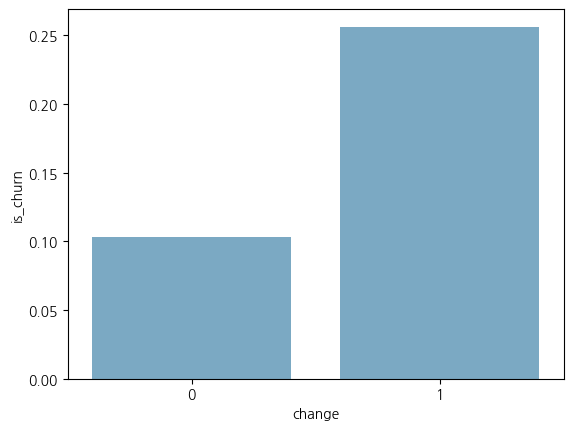

In [359]:
# 결제방식 변경여부
result_df = transaction_filtered.groupby('msno_num')[['payment_method_id']].nunique()
members_train_init = pd.merge(members, train, on = 'msno_num', how = 'inner')
member_transaction = pd.merge(result_df, members_train_init, on='msno_num', how = 'inner')
member_transaction['change'] = member_transaction['payment_method_id'].apply(lambda x: 1 if x>1 else 0) 
tmp = pd.DataFrame(member_transaction.groupby('change', as_index = False)['msno_num'].count())
tmp.replace({'change' : {0 : '결제방식 변경이력 없음', 1 : '결제방식 변경이력 있음'}}, inplace=True)

sns.barplot(x='change', y='is_churn', data=member_transaction, color='#6fadcf', errorbar=('ci',False))

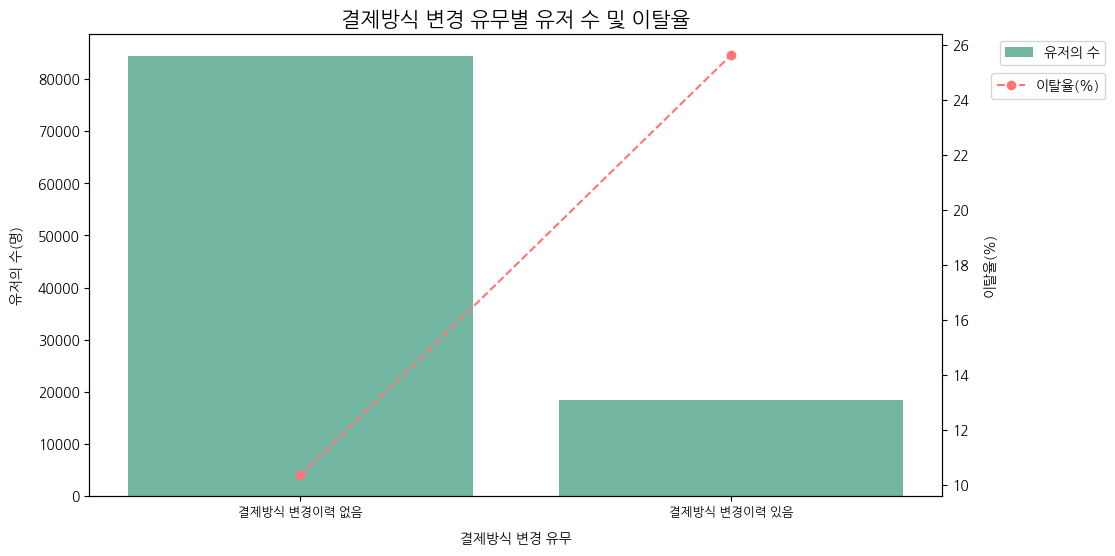

In [375]:
import numpy as np

result_df = transaction_filtered.groupby('msno_num')[['payment_method_id']].nunique()
members_train_init = pd.merge(members, train, on = 'msno_num', how = 'inner')
member_transaction = pd.merge(result_df, members_train_init, on='msno_num', how = 'inner')
member_transaction['change'] = member_transaction['payment_method_id'].apply(lambda x: 1 if x>1 else 0) 
tmp = pd.DataFrame(member_transaction.groupby('change', as_index = False)['msno_num'].count())
tmp.replace({'change' : {0 : '결제방식 변경이력 없음', 1 : '결제방식 변경이력 있음'}}, inplace=True)

idx = np.array([0, 1])

fig, ax = plt.subplots(figsize=(11,6))

plt.bar(idx, tmp['msno_num'], width = 0.8, label = '유저의 수', color = '#72B6A1')

plt.xticks(idx, tmp['change'], fontsize = 9)
plt.xlabel('결제방식 변경 유무', fontsize = 10, labelpad= 10)
plt.ylabel('유저의 수(명)', fontsize = 10, labelpad= 10)
plt.title('결제방식 변경 유무별 유저 수 및 이탈율', fontsize = 15)
plt.legend(bbox_to_anchor = (1.2, 1))

result_df = transaction_filtered.groupby('msno_num')[['payment_method_id']].nunique()
members_train_init = pd.merge(members, train, on = 'msno_num', how = 'inner')
member_transaction = pd.merge(result_df, members_train_init, on='msno_num', how = 'inner')
member_transaction['change'] = member_transaction['payment_method_id'].apply(lambda x: 1 if x>1 else 0)
tmp = pd.DataFrame(member_transaction.groupby(['change', 'is_churn'], as_index = False)['msno_num'].count())
tmp_0 = tmp.replace({'change' : {0 : '결제방식 변경이력 없음', 1 : '결제방식 변경이력 있음'}})
tmp_1 = tmp_0[tmp_0['is_churn']==0]
tmp_2 = tmp_0[tmp_0['is_churn']==1]
tmp_3 = pd.merge(tmp_1, tmp_2, on = 'change', how = 'inner').drop(columns=['is_churn_x', 'is_churn_y'])
tmp_3.fillna(0, inplace=True)
tmp_3['ratio'] = tmp_3['msno_num_y'] / (tmp_3['msno_num_x'] + tmp_3['msno_num_y']) * 100
tmp_3.drop(columns=['msno_num_x', 'msno_num_y'], inplace=True)

line_plot = ax.twinx()
line_plot.plot(tmp_3['change'], tmp_3['ratio'], marker = 'o', linestyle = '--', color = '#FF7575', label = '이탈율(%)')
line_plot.set_ylabel('이탈율(%)', fontsize = 10, labelpad= 10)
line_plot.legend(bbox_to_anchor = (1.2, 0.93))

plt.show()